# Testing Assumptions
We want to test the following assumptions:

- Our 'bins' follow the distribution of a Gaussian summed with an exponential
- Our bins are <small>IID</small>

In [97]:
%matplotlib inline
import matplotlib.mlab as mlab
from matplotlib import pyplot as plt
from scipy.stats import norm
import csv
import numpy as np
from sklearn.neighbors.kde import KernelDensity as kde
import seaborn as sns
import pandas as pd

In [87]:
data = open('../data/data.csv', 'r').readlines()
fieldnames = ['x', 'y', 'z', 'unmasked', 'synapses']
reader = csv.reader(data)
reader.next()

rows = [[int(col) for col in row] for row in reader]

In [88]:
unmaskedSynapses = ([r[-1] for r in rows if r[-2] != 0])
unmaskedSynapsesNoZero = ([r[-1] for r in rows if r[-2] != 0 if r[-1] !=0])

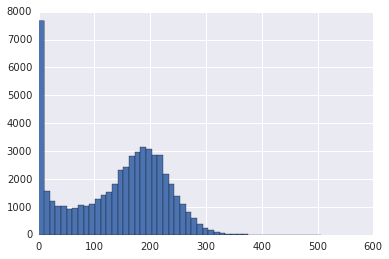

In [102]:
#including zeros
plt.hist(unmaskedSynapses, bins=50)
plt.show()


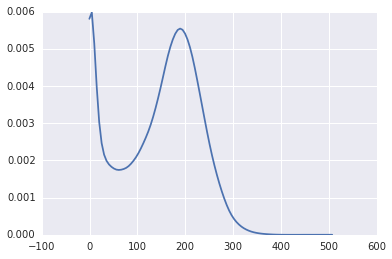

In [103]:
unmaskedSynapses = np.asarray(unmaskedSynapses)
sns.kdeplot(unmaskedSynapses)

In [91]:
#unmaskedSynapsesArr = np.asarray(unmaskedSynapses)
#unmaskedSynapsesArr.reshape(1,-1)


#kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(unmaskedSynapsesArr)

In [92]:
data = open('../data/data.csv', 'r').readlines()
fieldnames = ['x', 'y', 'z', 'unmasked', 'synapses']
reader = csv.reader(data)
reader.next()

rows = [[int(col) for col in row] for row in reader]

sorted_x = sorted(list(set([r[0] for r in rows])))
sorted_y = sorted(list(set([r[1] for r in rows])))
sorted_z = sorted(list(set([r[2] for r in rows])))

volume = np.ndarray((len(sorted_x), len(sorted_y), len(sorted_z)))
for row in rows:
    if row[-1] != 0:
        volume[sorted_x.index(row[0]), sorted_y.index(row[1]), sorted_z.index(row[2])] = row[-1]

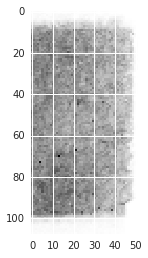

In [93]:
plt.imshow(np.amax(volume, axis=2), interpolation='nearest')
plt.show()

In [94]:
#datas = np.amax(volume, axis=2)
#print type(datas)

#for i in len(datas):
    #for j in len(datas[i]):
     #   dframe.append(x=i, y=j,value = )
        
#print np.amax(volume, axis=2)

#d = pd.DataFrame(data, columns=list('xy'))
#d = pd.DataFrame(data=data[0:,0:],index=data[1:,0], columns=data[0,1:])  

#print d
#sns.jointplot(x="x", y="y", data=d, kind="kde");

153.530848944 77.4255887061


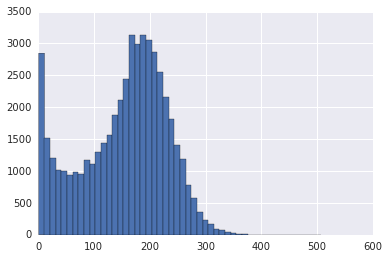

In [108]:
plt.hist(unmaskedSynapsesNoZero, bins=50)
(mu, sigma) = norm.fit(unmaskedSynapsesNoZero)

print mu, sigma
y = mlab.normpdf( 50, mu, sigma)
plt.plot(100, y, 'r--', linewidth=2)


plt.show()